In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv("train.csv")
df_train

,Usage,Text,Label
0,Public,َ قَالَ النَّبِيُّ ص إِنِّي أَتَعَجَّبُ مِمَّن...,hau
1,Public,Filmen forteller historien om Will Hunting en...,nob
2,Public,An Arthrostylidium berryi in uska species han ...,wln
3,Public,Kancunarí enemigosniyquichejta munacuychej al...,quh
4,Public,Warmeqa ama yachachichunchu hermanospa tantaku...,quh
...,...,...,...
190594,Public,Publié par Masken à 22:46 Aucun commentaire:,hat
190595,Public,ειπεν δε προς τους μαθητας ελευσονται ημεραι ο...,grc
190596,Public,Ya bay boch ban’en ni kug rung’aged ni ga be y...,yap
190597,Public,P'alimentase nun absuerben el sangre sinón qu...,ast


In [4]:
df_train.head()

,Usage,Text,Label
0,Public,َ قَالَ النَّبِيُّ ص إِنِّي أَتَعَجَّبُ مِمَّن...,hau
1,Public,Filmen forteller historien om Will Hunting en...,nob
2,Public,An Arthrostylidium berryi in uska species han ...,wln
3,Public,Kancunarí enemigosniyquichejta munacuychej al...,quh
4,Public,Warmeqa ama yachachichunchu hermanospa tantaku...,quh


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190599 entries, 0 to 190598
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Usage   190599 non-null  object
 1   Text    190599 non-null  object
 2   Label   190099 non-null  object
dtypes: object(3)
memory usage: 4.4+ MB


In [8]:
print(f"Nombre de langues uniques : {df_train['Label'].nunique()}")

Nombre de langues uniques : 389


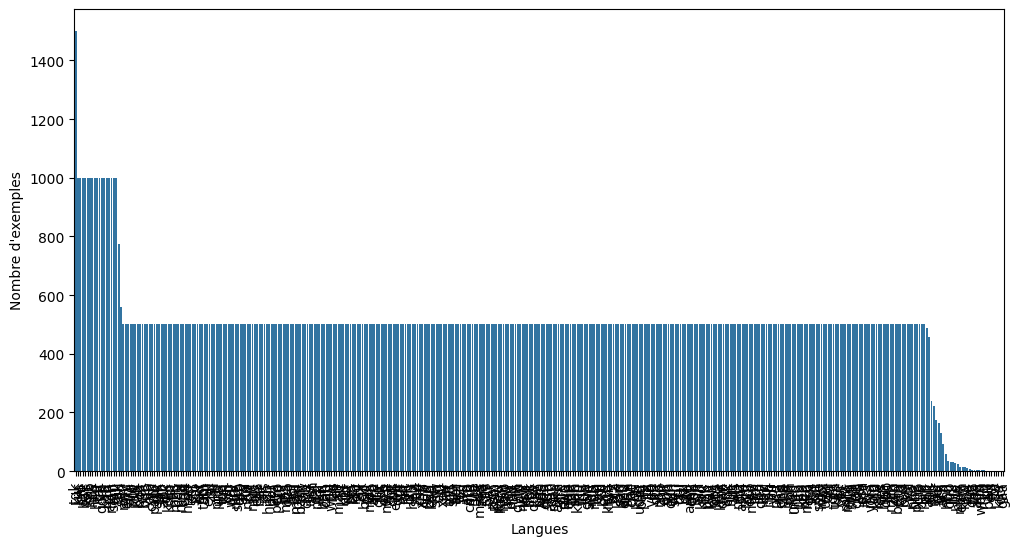

In [20]:
lang_counts = df_train['Label'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=lang_counts.index, y=lang_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Langues")
plt.ylabel("Nombre d'exemples")
plt.show()

In [1]:
import pandas as pd

# Charger le fichier CSV existant
df = pd.read_csv('submission.csv')

# Modifier la colonne 'id' pour qu'elle commence à 1
df['id'] = df.index + 1

# Sauvegarder le DataFrame modifié dans un nouveau fichier CSV
df.to_csv('fichier_modifié.csv', index=False)

print("CSV modifié et sauvegardé sous 'fichier_modifié.csv'")


CSV modifié et sauvegardé sous 'fichier_modifié.csv'
